Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17542 entries, 0 to 17541
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant Name  17542 non-null  object
 1   Location         17542 non-null  object
 2   Review           17542 non-null  object
dtypes: object(3)
memory usage: 411.3+ KB
None


First 5 rows of the dataset:
  Restaurant Name            Location  \
0    Little Pearl  Washington DC, USA   
1    Little Pearl  Washington DC, USA   
2    Little Pearl  Washington DC, USA   
3    Little Pearl  Washington DC, USA   
4    Little Pearl  Washington DC, USA   

                                              Review  
0  Summary: This place is DOPE!  The food was abs...  
1  We had a wonderful anniversary celebration her...  
2  As a Michelin Star restaurant, I knew that I w...  
3  The Little Pearl offers a unique 7-course tast...  
4  We had a lovely celebration at Little Pearl! E

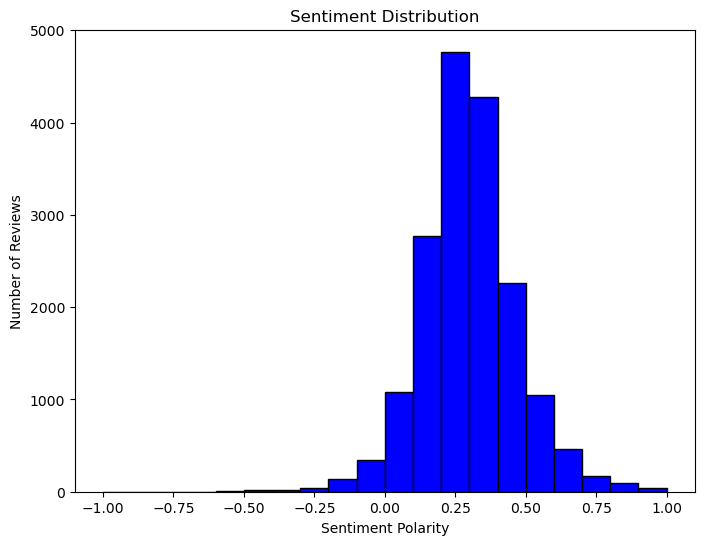

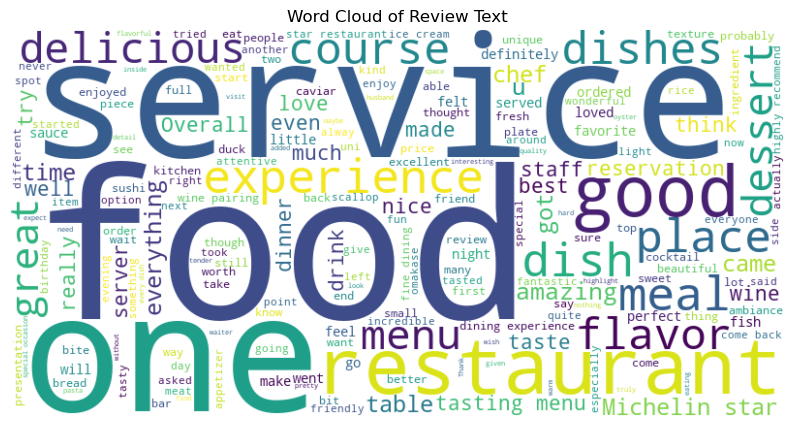

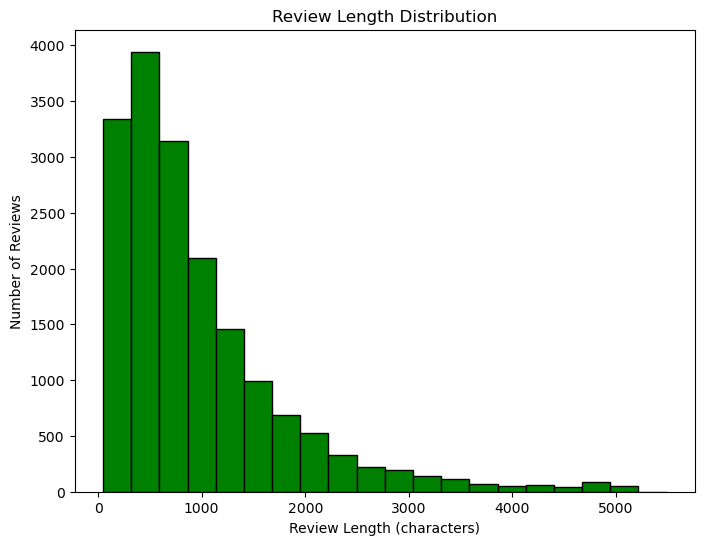

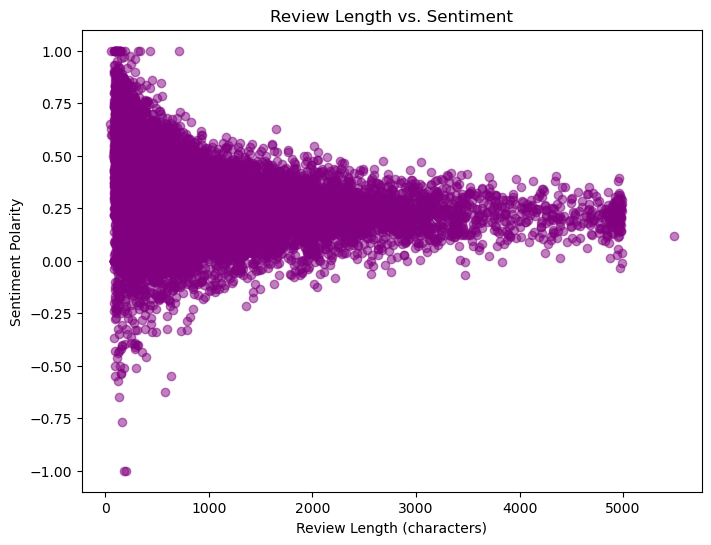

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Load the first 100 rows from the CSV file
file_path = 'Michelin Reviews.csv'  # Replace with the actual file path
reviews_df = pd.read_csv(file_path)

# Rename columns to match if they are not properly named
reviews_df.columns = ['Restaurant Name', 'Location', 'Review']

# Display basic info about the data
print("Data Information:")
print(reviews_df.info())
print("\n")

# Show the first few rows of the dataset
print("First 5 rows of the dataset:")
print(reviews_df.head())
print("\n")

# Check for missing values
print("Missing Data:")
print(reviews_df.isnull().sum())
print("\n")

# Basic statistics about the review length
reviews_df['review_length'] = reviews_df['Review'].apply(len)
print("Review Length Statistics:")
print(reviews_df['review_length'].describe())
print("\n")

# Sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the reviews
reviews_df['sentiment'] = reviews_df['Review'].apply(get_sentiment)
print("Sentiment Analysis Statistics:")
print(reviews_df['sentiment'].describe())
print("\n")

# Plot sentiment distribution
plt.figure(figsize=(8,6))
plt.hist(reviews_df['sentiment'], bins=20, color='blue', edgecolor='black')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Reviews")
plt.show()

# Generate a word cloud for the reviews
all_reviews_text = ' '.join(reviews_df['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Review Text")
plt.show()

# Review length distribution
plt.figure(figsize=(8,6))
plt.hist(reviews_df['review_length'], bins=20, color='green', edgecolor='black')
plt.title("Review Length Distribution")
plt.xlabel("Review Length (characters)")
plt.ylabel("Number of Reviews")
plt.show()

# Correlation between review length and sentiment
plt.figure(figsize=(8,6))
plt.scatter(reviews_df['review_length'], reviews_df['sentiment'], alpha=0.5, color='purple')
plt.title("Review Length vs. Sentiment")
plt.xlabel("Review Length (characters)")
plt.ylabel("Sentiment Polarity")
plt.show()


Term Frequency Analysis (Filtered):


C:\Users\shaun\AppData\Local\Temp\ipykernel_39036\1687275229.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


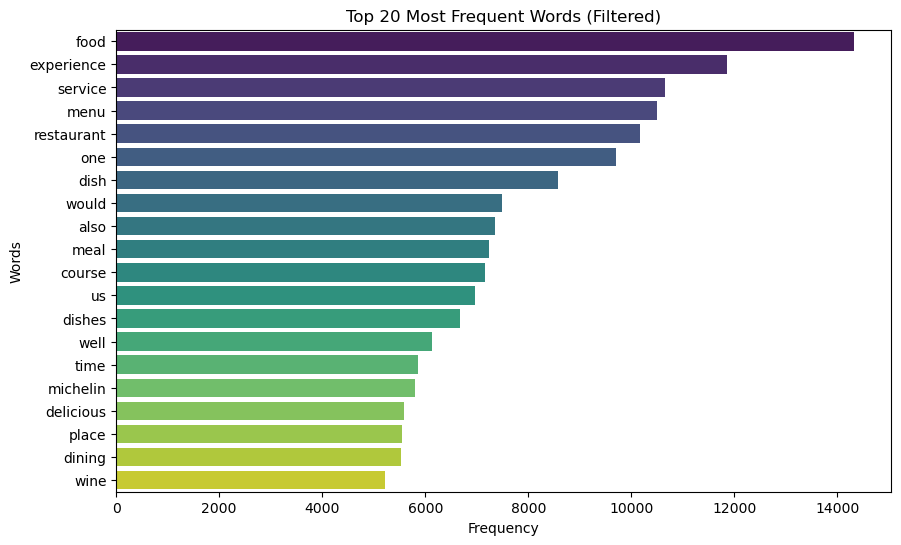

TF-IDF Analysis (Filtered):


C:\Users\shaun\AppData\Local\Temp\ipykernel_39036\1687275229.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores), y=list(words), palette="plasma")


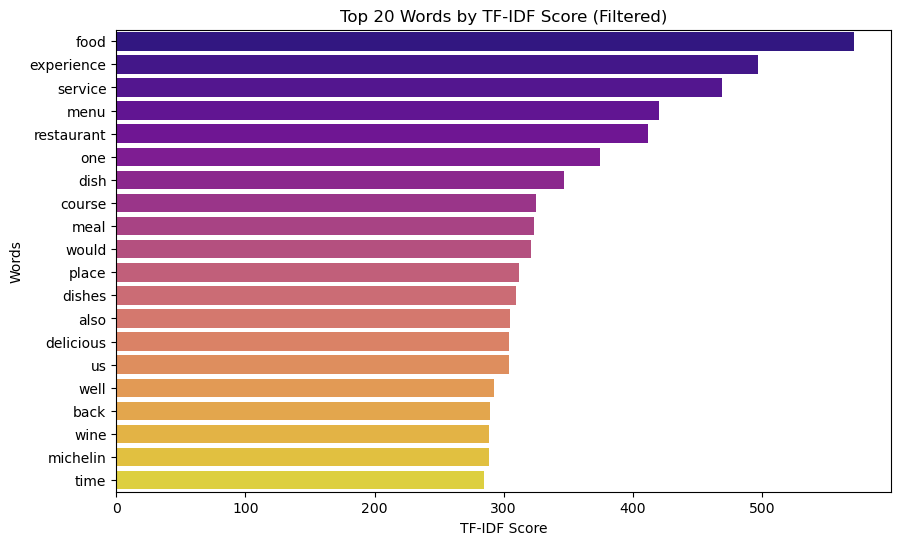

Bigram Analysis:


C:\Users\shaun\AppData\Local\Temp\ipykernel_39036\1687275229.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(bigram_str), palette="coolwarm")


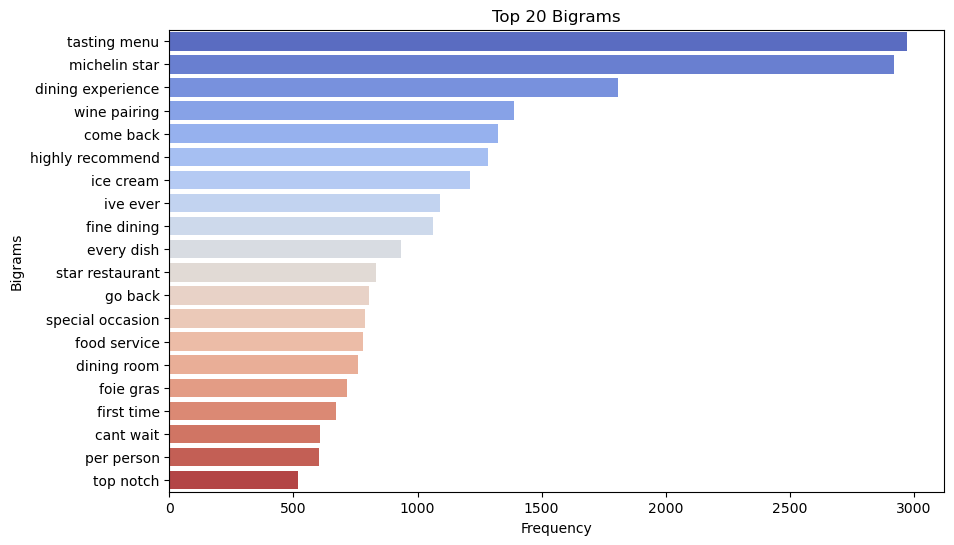

Topic Modeling (LDA):
Topic 1: sushi, omakase, chef, fish, uni, rice, japanese, sake, experience, fresh
Topic 2: food, service, restaurant, experience, menu, place, time, michelin, meal, dishes
Topic 3: dish, menu, course, dessert, delicious, dishes, meal, flavor, favorite, sauce
Topic 4: duck, sweet, sauce, flavor, delicious, crispy, chicken, ordered, bread, dish
Topic 5: experience, food, service, dining, menu, wine, restaurant, staff, meal, chef
Extended Word Cloud:


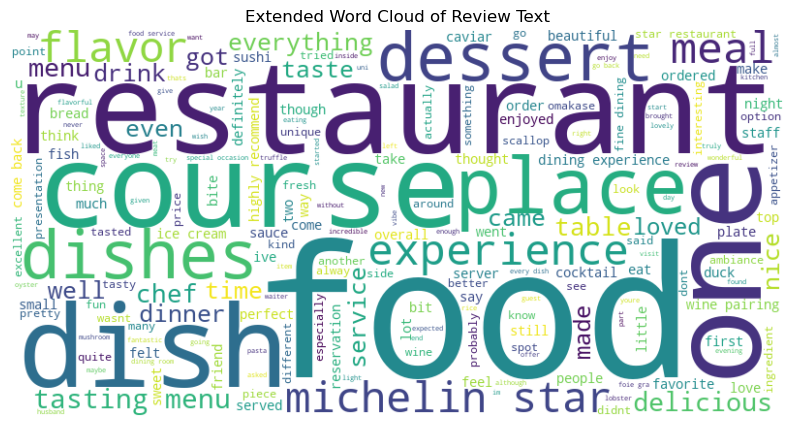

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from nltk import FreqDist
from nltk.util import ngrams

# Load the first 100 rows from the CSV file
file_path = 'Michelin Reviews.csv'  # Replace with the actual file path
reviews_df = pd.read_csv(file_path)

# Add custom stopwords for filtering out generic terms
custom_stopwords = stopwords.words('english') + ['good', 'great', 'amazing', 'just', 'really', 'like', 'best']

# Function to preprocess text: lowercasing, removing punctuation, stopwords, etc.
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = ''.join([char for char in text if char.isalnum() or char == ' '])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in custom_stopwords])  # Remove stopwords
    return text

# Preprocess all reviews
reviews_df['cleaned_review'] = reviews_df['Review'].apply(preprocess_text)

# Term Frequency (TF) Analysis with custom stopwords
def plot_term_frequency(corpus, n=20):
    vectorizer = CountVectorizer(stop_words=custom_stopwords)
    X = vectorizer.fit_transform(corpus)
    word_counts = X.sum(axis=0).A1
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
    
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    
    # Plot top n words
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top {n} Most Frequent Words (Filtered)")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Plot top 20 words with custom stopwords
print("Term Frequency Analysis (Filtered):")
plot_term_frequency(reviews_df['cleaned_review'], n=20)

# TF-IDF Analysis with custom stopwords
def plot_tfidf_terms(corpus, n=20):
    tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stopwords)
    X_tfidf = tfidf_vectorizer.fit_transform(corpus)
    tfidf_scores = X_tfidf.sum(axis=0).A1
    tfidf_freq = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_scores))
    
    top_tfidf_words = sorted(tfidf_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    
    # Plot top n words by TF-IDF
    words, scores = zip(*top_tfidf_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(scores), y=list(words), palette="plasma")
    plt.title(f"Top {n} Words by TF-IDF Score (Filtered)")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.show()

# Plot top 20 words by TF-IDF with custom stopwords
print("TF-IDF Analysis (Filtered):")
plot_tfidf_terms(reviews_df['cleaned_review'], n=20)


# Bigram Analysis
def plot_ngrams(corpus, n=20):
    stop_words = set(stopwords.words('english'))
    all_bigrams = []
    for text in corpus:
        words = [word for word in text.split() if word not in stop_words]
        bigrams = list(ngrams(words, 2))
        all_bigrams.extend(bigrams)
    
    bigram_freq = FreqDist(all_bigrams)
    common_bigrams = bigram_freq.most_common(n)
    
    bigrams, counts = zip(*common_bigrams)
    bigram_str = [' '.join(bigram) for bigram in bigrams]
    
    # Plot top n bigrams
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(bigram_str), palette="coolwarm")
    plt.title(f"Top {n} Bigrams")
    plt.xlabel("Frequency")
    plt.ylabel("Bigrams")
    plt.show()

# Plot top 20 bigrams
print("Bigram Analysis:")
plot_ngrams(reviews_df['cleaned_review'], n=20)

# Topic Modeling with LDA (Latent Dirichlet Allocation)
from sklearn.decomposition import LatentDirichletAllocation

def perform_topic_modeling(corpus, num_topics=5, num_words=10):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(corpus)
    
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    
    # Display topics and top words
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_features)}")

# Perform topic modeling
print("Topic Modeling (LDA):")
perform_topic_modeling(reviews_df['cleaned_review'], num_topics=5, num_words=10)

# Word Cloud (Extended)
print("Extended Word Cloud:")
all_reviews_text = ' '.join(reviews_df['cleaned_review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(all_reviews_text)

# Plot the extended word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Extended Word Cloud of Review Text")
plt.show()


In [9]:
food_keywords = ['dish', 'meal', 'delicious', 'taste', 'flavor', 'menu', 'course']
service_keywords = ['staff', 'service', 'waiter', 'waitress', 'friendly', 'polite']
ambiance_keywords = ['ambiance', 'atmosphere', 'environment', 'decor', 'vibe']

def get_aspect_sentiment(review, aspect_keywords):
    for keyword in aspect_keywords:
        if keyword in review:
            return TextBlob(review).sentiment.polarity
    return None

# Apply aspect sentiment for each review
reviews_df['food_sentiment'] = reviews_df['Review'].apply(lambda x: get_aspect_sentiment(x, food_keywords))
reviews_df['service_sentiment'] = reviews_df['Review'].apply(lambda x: get_aspect_sentiment(x, service_keywords))
reviews_df['ambiance_sentiment'] = reviews_df['Review'].apply(lambda x: get_aspect_sentiment(x, ambiance_keywords))

# Calculate averages for each sentiment type
avg_food_sentiment = reviews_df['food_sentiment'].mean()
avg_service_sentiment = reviews_df['service_sentiment'].mean()
avg_ambiance_sentiment = reviews_df['ambiance_sentiment'].mean()

print(f"Average Food Sentiment: {avg_food_sentiment}")
print(f"Average Service Sentiment: {avg_service_sentiment}")
print(f"Average Ambiance Sentiment: {avg_ambiance_sentiment}")


Average Food Sentiment: 0.29470003944259243
Average Service Sentiment: 0.3040309679645559
Average Ambiance Sentiment: 0.3044375196234465


C:\Users\shaun\AppData\Local\Temp\ipykernel_39036\2302836792.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


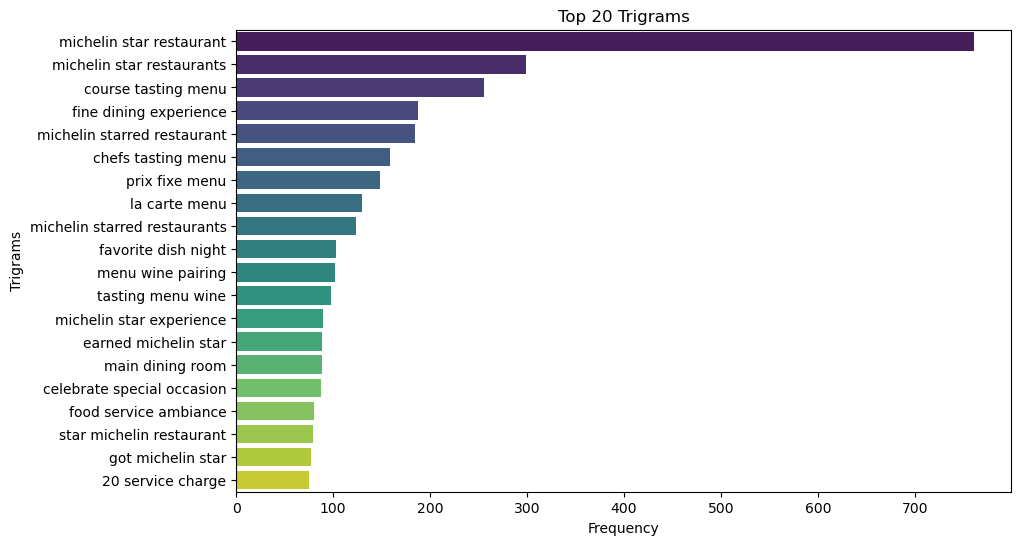

In [10]:
def plot_ngrams(corpus, n=20, ngram_range=(2, 3)):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    word_counts = X.sum(axis=0).A1
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
    
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    
    # Plot top n trigrams
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top {n} Trigrams")
    plt.xlabel("Frequency")
    plt.ylabel("Trigrams")
    plt.show()

# Plot top 20 trigrams
plot_ngrams(reviews_df['cleaned_review'], n=20, ngram_range=(3, 3))


In [12]:
import pandas as pd
from textblob import TextBlob

# Load the CSV file
file_path = 'Michelin Reviews.csv'  # Replace with the actual file path
reviews_df = pd.read_csv(file_path)

# Rename columns to match if they are not properly named
reviews_df.columns = ['Restaurant Name', 'Location', 'Review']

# Expanded keyword sets for different aspects
food_keywords = ['dish', 'meal', 'menu', 'flavor', 'taste', 'cuisine', 'ingredient', 'course', 'chef', 'delicious', 'spicy', 'sweet', 'sour', 'savory', 'portion', 'plate', 'seasoning', 'presentation', 'tender', 'crispy', 'texture', 'sauce', 'dessert', 'appetizer', 'main course', 'fish', 'meat', 'vegetarian', 'vegan', 'pasta', 'steak', 'pizza', 'bread', 'seafood', 'wine', 'drink', 'cocktail', 'beverage', 'beer']

service_keywords = ['service', 'staff', 'waiter', 'waitress', 'host', 'friendly', 'polite', 'attentive', 'helpful', 'professional', 'quick', 'slow', 'rude', 'courteous', 'manager', 'sommelier', 'bartender', 'welcoming', 'reservation', 'table', 'order', 'experience', 'timely', 'recommendation', 'customer service']

ambiance_keywords = ['ambiance', 'atmosphere', 'decor', 'lighting', 'environment', 'music', 'vibe', 'setting', 'interior', 'exterior', 'view', 'comfortable', 'romantic', 'noise', 'noisy', 'quiet', 'elegant', 'modern', 'traditional', 'cozy', 'spacious', 'crowded', 'intimate']

# Function to extract sentiment for a specific aspect based on keywords
def get_aspect_sentiment(review, aspect_keywords):
    review = review.lower()  # Case-insensitive matching
    for keyword in aspect_keywords:
        if keyword in review:
            return TextBlob(review).sentiment.polarity
    return None

# Apply aspect sentiment for each review
reviews_df['food_sentiment'] = reviews_df['Review'].apply(lambda x: get_aspect_sentiment(x, food_keywords))
reviews_df['service_sentiment'] = reviews_df['Review'].apply(lambda x: get_aspect_sentiment(x, service_keywords))
reviews_df['ambiance_sentiment'] = reviews_df['Review'].apply(lambda x: get_aspect_sentiment(x, ambiance_keywords))

# Calculate averages for each sentiment type
avg_food_sentiment = reviews_df['food_sentiment'].mean()
avg_service_sentiment = reviews_df['service_sentiment'].mean()
avg_ambiance_sentiment = reviews_df['ambiance_sentiment'].mean()

print(f"Average Food Sentiment: {avg_food_sentiment}")
print(f"Average Service Sentiment: {avg_service_sentiment}")
print(f"Average Ambiance Sentiment: {avg_ambiance_sentiment}")

# Display the aspect sentiment analysis result
reviews_df[['Restaurant Name', 'Location', 'food_sentiment', 'service_sentiment', 'ambiance_sentiment']].head()


Average Food Sentiment: 0.2975874665972543
Average Service Sentiment: 0.2979541506141742
Average Ambiance Sentiment: 0.2891501500692198


,Restaurant Name,Location,food_sentiment,service_sentiment,ambiance_sentiment
0,Little Pearl,"Washington DC, USA",0.259101,0.259101,0.259101
1,Little Pearl,"Washington DC, USA",0.280754,0.280754,NaN
2,Little Pearl,"Washington DC, USA",0.105496,0.105496,NaN
3,Little Pearl,"Washington DC, USA",0.303406,0.303406,NaN
4,Little Pearl,"Washington DC, USA",0.341563,NaN,0.341563


In [14]:
from sklearn.decomposition import LatentDirichletAllocation

file_path = 'Michelin Reviews.csv'  # Replace with the actual file path
reviews_df = pd.read_csv(file_path)

# Add custom stopwords for filtering out generic terms
custom_stopwords = stopwords.words('english') + ['good', 'great', 'amazing', 'just', 'really', 'like', 'best']

# Function to preprocess text: lowercasing, removing punctuation, stopwords, etc.
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = ''.join([char for char in text if char.isalnum() or char == ' '])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in custom_stopwords])  # Remove stopwords
    return text

# Preprocess all reviews
reviews_df['cleaned_review'] = reviews_df['Review'].apply(preprocess_text)

def perform_topic_modeling(corpus, num_topics=5, num_words=10):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(corpus)
    
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    
    # Display topics and top words
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_features)}")

# Perform topic modeling
perform_topic_modeling(reviews_df['cleaned_review'], num_topics=5, num_words=10)


Topic 1: sushi, omakase, chef, fish, uni, rice, japanese, sake, experience, fresh
Topic 2: food, service, restaurant, experience, menu, place, time, michelin, meal, dishes
Topic 3: dish, menu, course, dessert, delicious, dishes, meal, flavor, favorite, sauce
Topic 4: duck, sweet, sauce, flavor, delicious, crispy, chicken, ordered, bread, dish
Topic 5: experience, food, service, dining, menu, wine, restaurant, staff, meal, chef


# Just Looking at Michelin Restaurants without Reviews

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       235 non-null    int64 
 1   Distinction      235 non-null    object
 2   Name             235 non-null    object
 3   Location         235 non-null    object
 4   Price            235 non-null    object
 5   Cuisine          235 non-null    object
 6   Price_Numerical  235 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 13.0+ KB
None


First few rows of the dataset:
   Unnamed: 0 Distinction                  Name      Location Price  \
0          24      1 Star       Alma Fonda Fina   Denver, USA    $$   
1          25      1 Star                 Brutø   Denver, USA  $$$$   
2          26      1 Star                  Bosq    Aspen, USA  $$$$   
3          27      1 Star                Beckon   Denver, USA  $$$$   
4          28      1 Star  F

C:\Users\shaun\AppData\Local\Temp\ipykernel_39036\4178672901.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=restaurants_df, x='Distinction', palette='Set2')


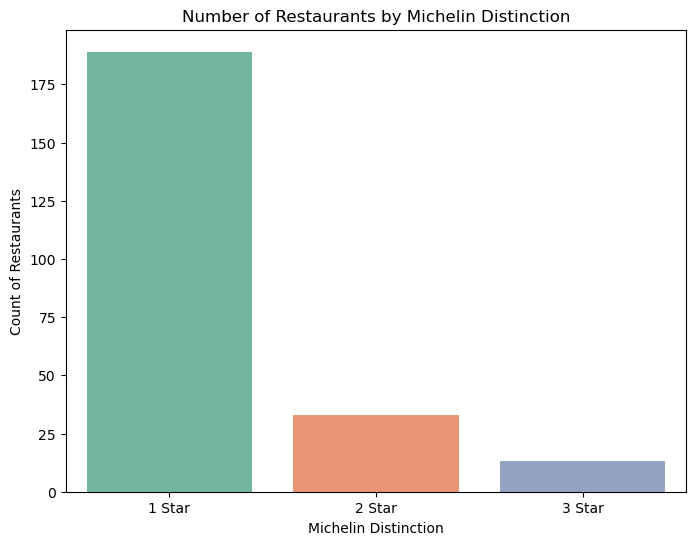

C:\Users\shaun\AppData\Local\Temp\ipykernel_39036\4178672901.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=restaurants_df, x='Price_Numerical', palette='Set3')


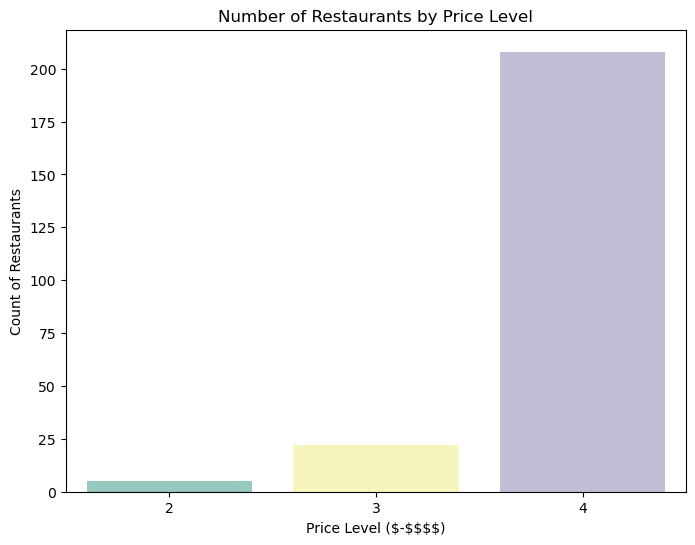

C:\Users\shaun\AppData\Local\Temp\ipykernel_39036\4178672901.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='coolwarm')


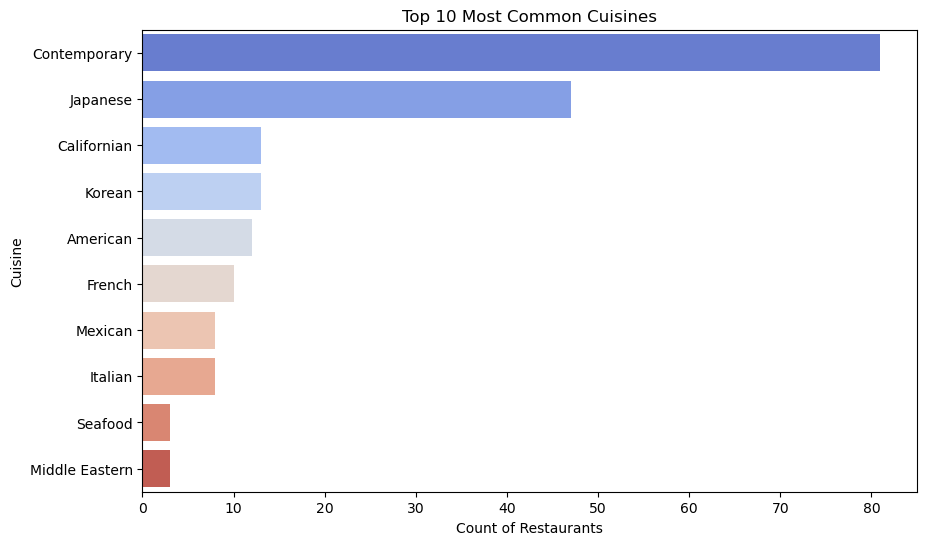

C:\Users\shaun\AppData\Local\Temp\ipykernel_39036\4178672901.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='Blues_r')


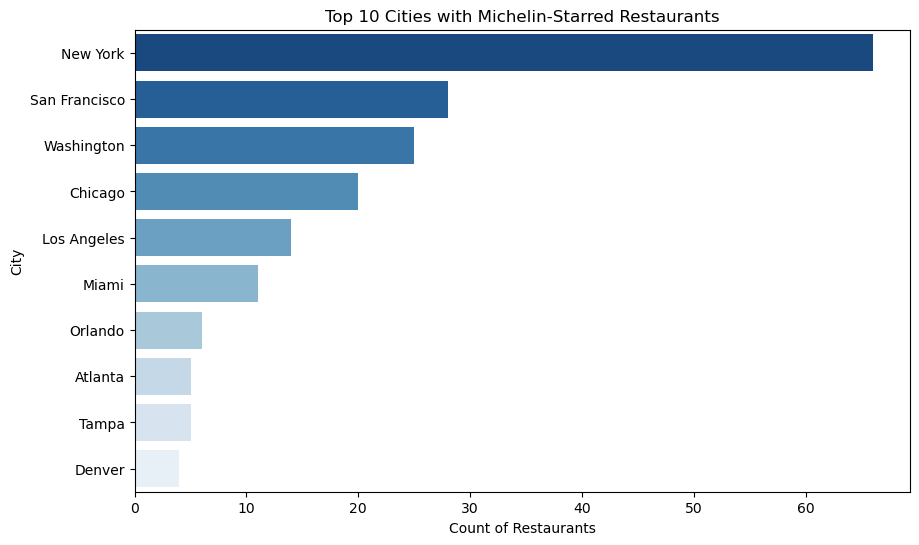

C:\Users\shaun\AppData\Local\Temp\ipykernel_39036\4178672901.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_cuisine.values, y=avg_price_by_cuisine.index, palette='magma')


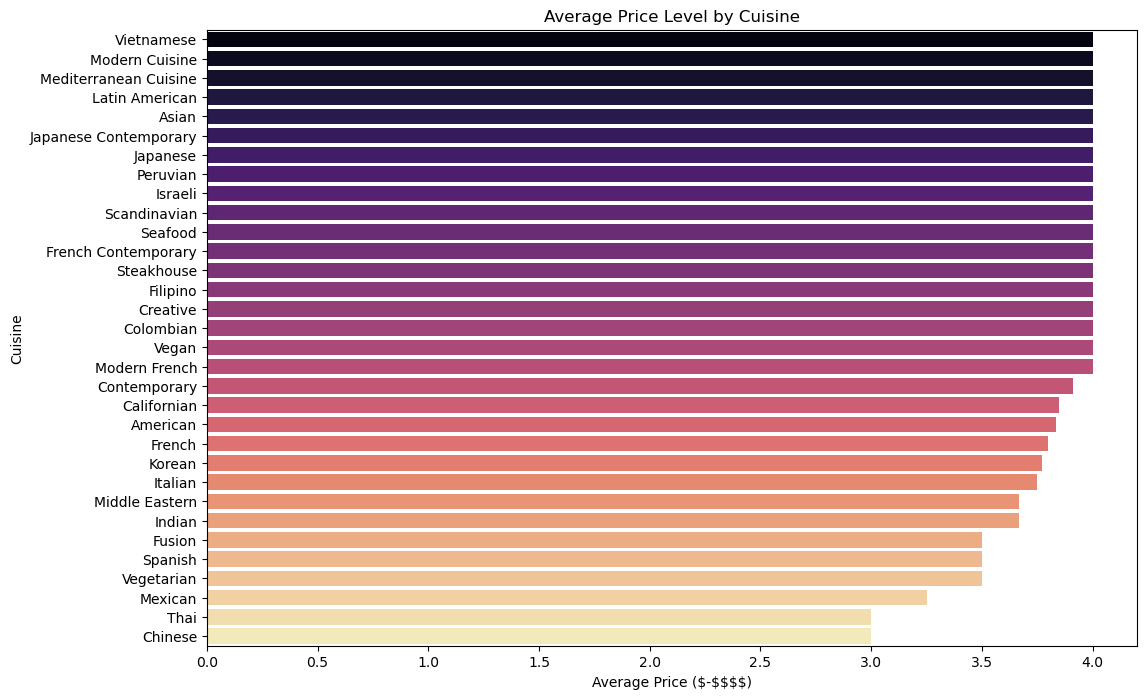

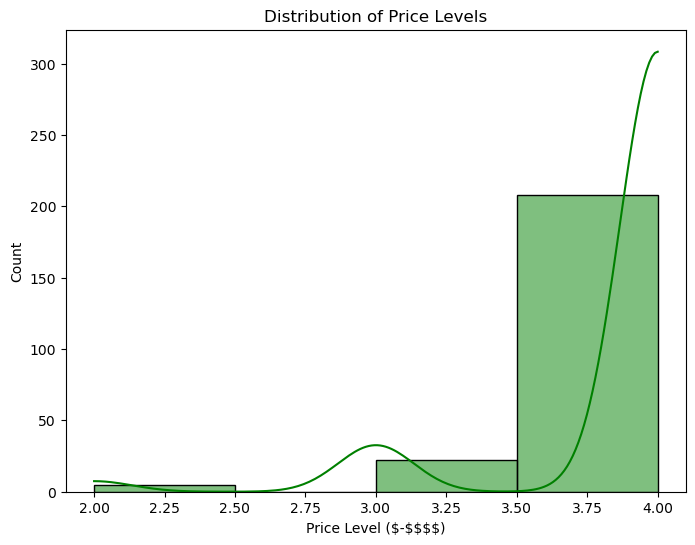

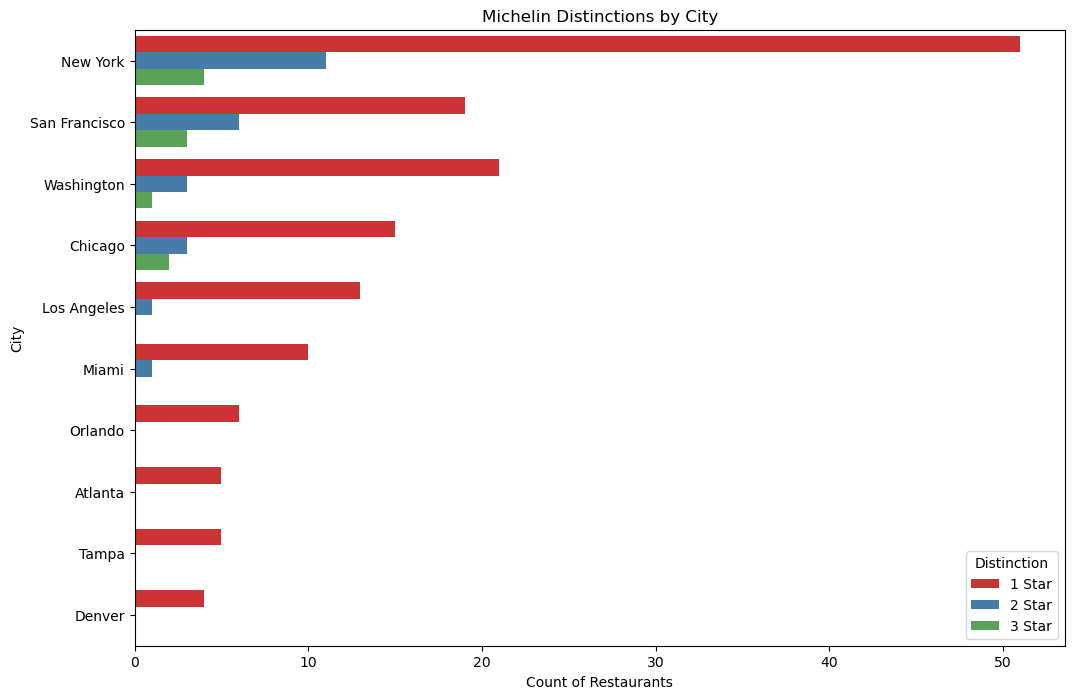

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'michelin_restaurants_usa.csv'  # Replace with the actual file path
restaurants_df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Basic Information:")
print(restaurants_df.info())
print("\n")

# Display the first few rows to get a sense of the data
print("First few rows of the dataset:")
print(restaurants_df.head())
print("\n")

# Check for missing values
print("Missing values in each column:")
print(restaurants_df.isnull().sum())
print("\n")

# Summary statistics of numerical columns (Price_Numerical)
print("Summary statistics for numerical columns:")
print(restaurants_df.describe())

# Remove the 'Unnamed: 0' column if it is not necessary
if 'Unnamed: 0' in restaurants_df.columns:
    restaurants_df.drop(columns=['Unnamed: 0'], inplace=True)

# Bar plot to visualize the number of restaurants per Michelin distinction (1 Star, 2 Stars, 3 Stars)
plt.figure(figsize=(8, 6))
sns.countplot(data=restaurants_df, x='Distinction', palette='Set2')
plt.title('Number of Restaurants by Michelin Distinction')
plt.xlabel('Michelin Distinction')
plt.ylabel('Count of Restaurants')
plt.show()

# Bar plot to visualize the number of restaurants by Price level
plt.figure(figsize=(8, 6))
sns.countplot(data=restaurants_df, x='Price_Numerical', palette='Set3')
plt.title('Number of Restaurants by Price Level')
plt.xlabel('Price Level ($-$$$$)')
plt.ylabel('Count of Restaurants')
plt.show()

# Top 10 most common cuisines
top_cuisines = restaurants_df['Cuisine'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='coolwarm')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Count of Restaurants')
plt.ylabel('Cuisine')
plt.show()

# Number of restaurants by location (Top 10 cities)
restaurants_df['City'] = restaurants_df['Location'].apply(lambda x: x.split(",")[0])  # Extract the city from the location
top_cities = restaurants_df['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_cities.index, x=top_cities.values, palette='Blues_r')
plt.title('Top 10 Cities with Michelin-Starred Restaurants')
plt.xlabel('Count of Restaurants')
plt.ylabel('City')
plt.show()

# Average price level by cuisine
plt.figure(figsize=(12, 8))
avg_price_by_cuisine = restaurants_df.groupby('Cuisine')['Price_Numerical'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_cuisine.values, y=avg_price_by_cuisine.index, palette='magma')
plt.title('Average Price Level by Cuisine')
plt.xlabel('Average Price ($-$$$$)')
plt.ylabel('Cuisine')
plt.show()

# Distribution of price levels
plt.figure(figsize=(8, 6))
sns.histplot(restaurants_df['Price_Numerical'], bins=4, kde=True, color='green')
plt.title('Distribution of Price Levels')
plt.xlabel('Price Level ($-$$$$)')
plt.ylabel('Count')
plt.show()

# Count plot of Michelin Distinctions across different cities
plt.figure(figsize=(12, 8))
sns.countplot(data=restaurants_df, y='City', hue='Distinction', order=top_cities.index, palette='Set1')
plt.title('Michelin Distinctions by City')
plt.xlabel('Count of Restaurants')
plt.ylabel('City')
plt.legend(title='Distinction')
plt.show()
